In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage import io
from skimage.transform import resize
from skimage import img_as_ubyte
from tqdm import tqdm

%matplotlib inline

In [ ]:
#https://neptune.ai/blog/data-exploration-for-image-segmentation-and-object-detection
#https://www.kaggle.com/cc786537662/initial-eda-image-processing
#https://github.com/Pyligent/food101-image-classification/blob/master/food-101_EDA_Model_RestNet_final.ipynb

#

# Sample Images

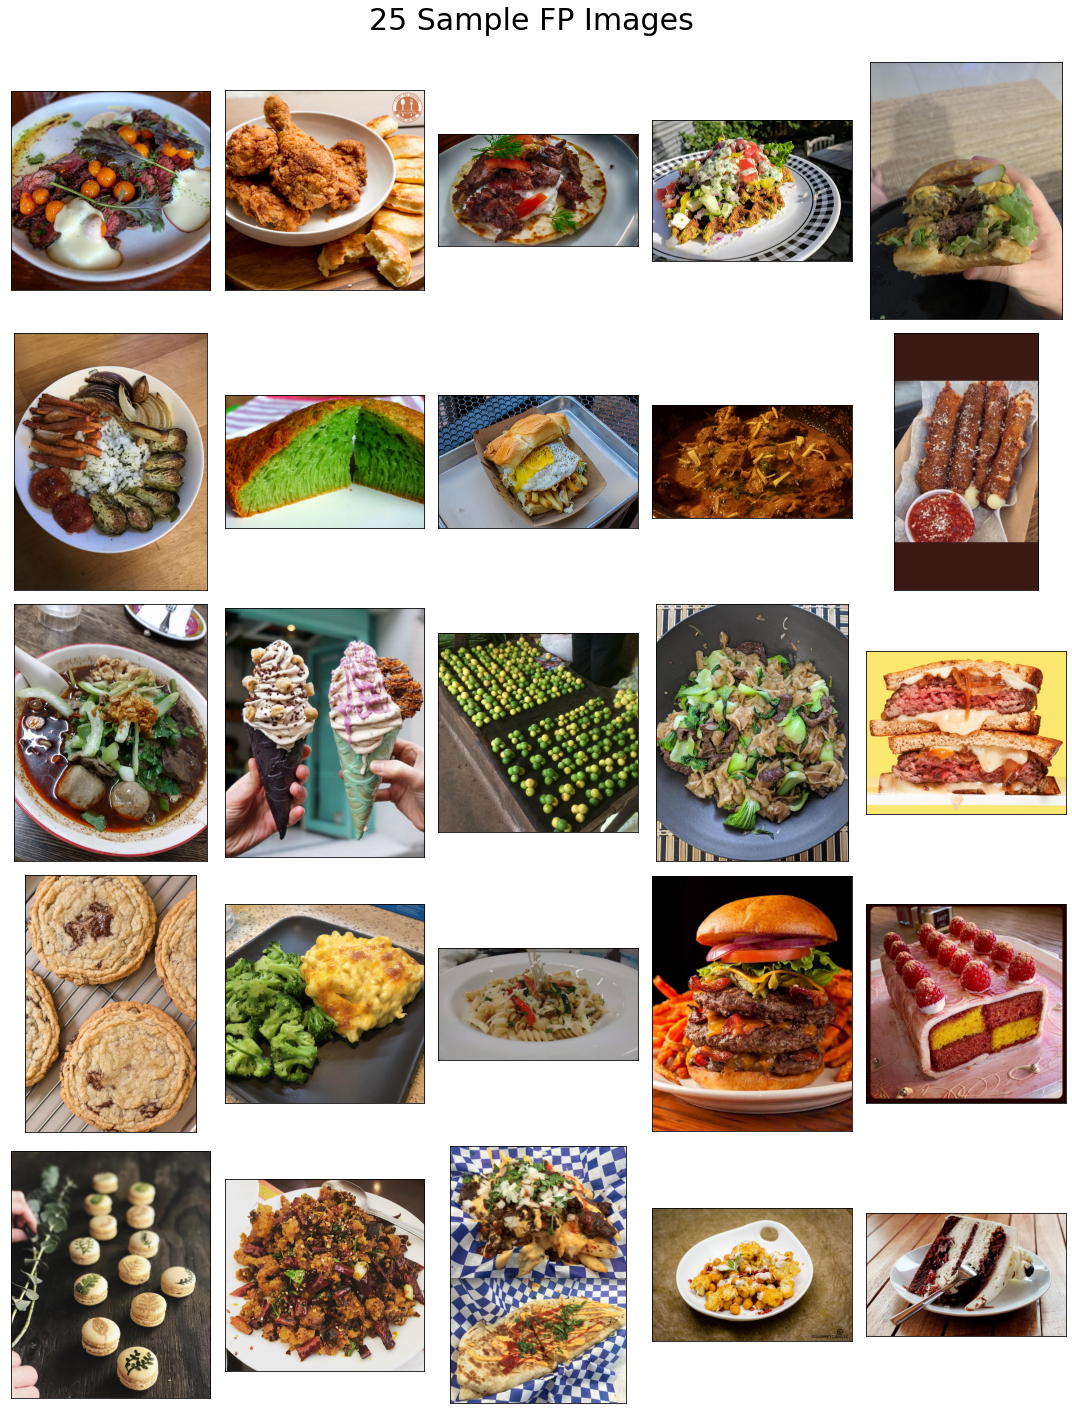

In [28]:
rows = 5
cols = 5
axes=[]
fig=plt.figure(figsize=(15,20))

fp_path = 'Images/FP'
fp_list = os.listdir(fp_path)

for a in range(rows*cols):
    np.random.seed(a)
    img = io.imread(f'{fp_path}/{fp_list[np.random.randint(len(fp_list))]}')
    axes.append( fig.add_subplot(rows, cols, a+1) )
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    fig.suptitle('25 Sample FP Images \n', fontsize=30)
fig.tight_layout()    

FP images are appetizing, and aestheticly pleasing; Even the mac & cheese and fried chicken dishes. Some are even artistic such as the macaroons (lower left). But we also see some that are simply good food that the user wished to share, such as the double cheese burger (top right), with less attention to the presentation - this cheese burger is in the user's hand and their shadow is cast over the image.

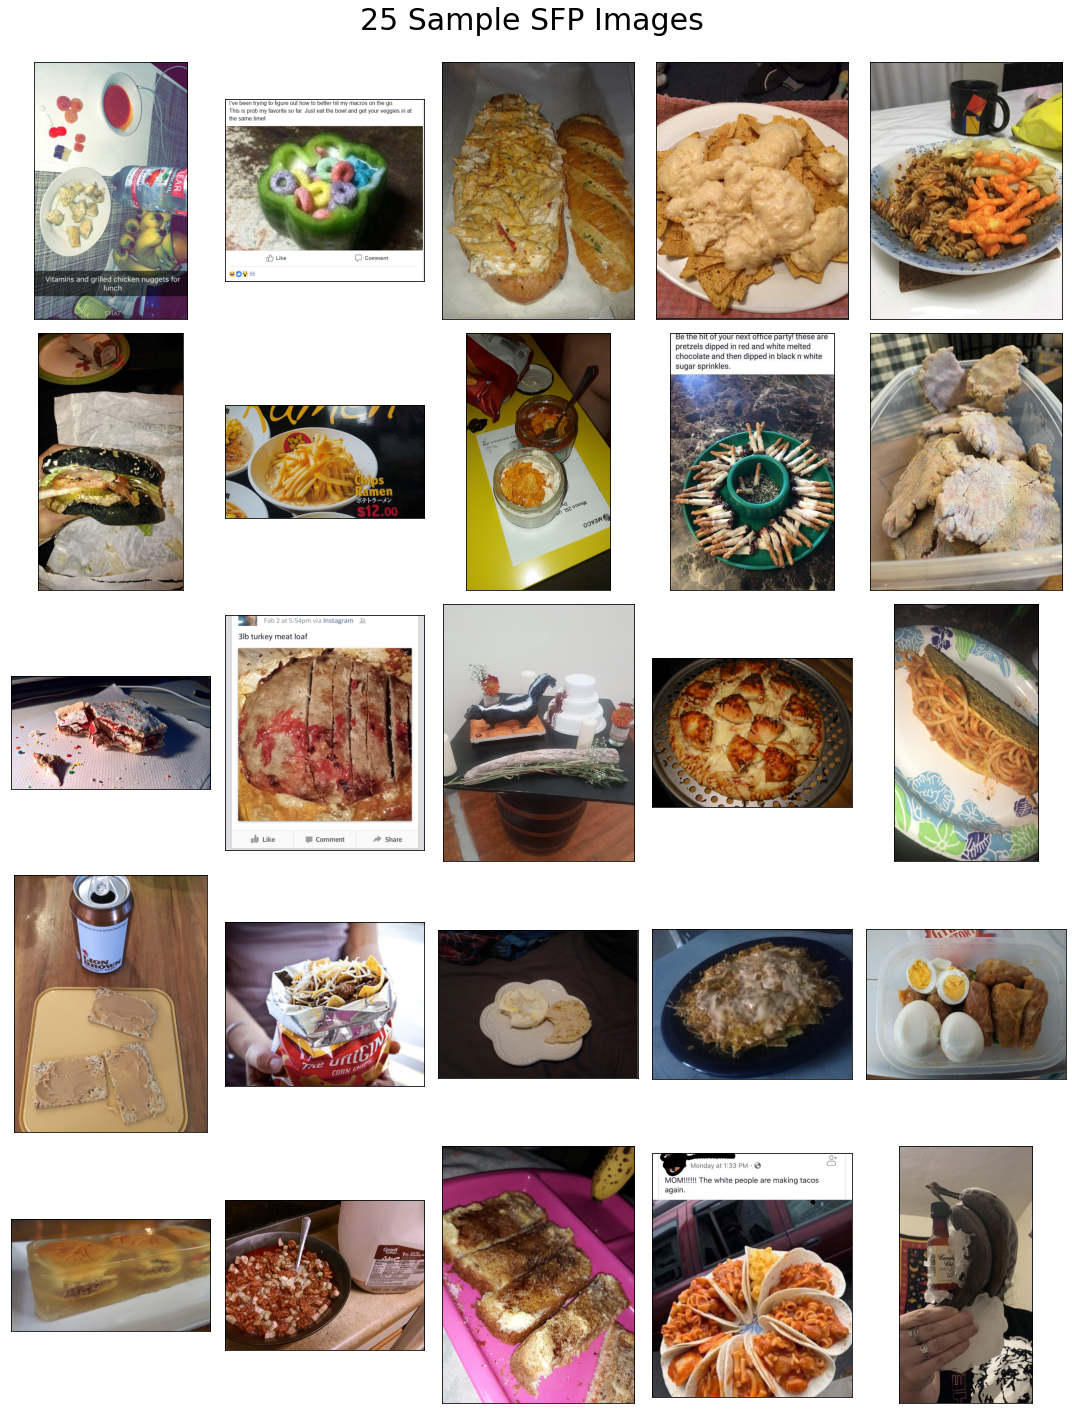

In [27]:
rows = 5
cols = 5
axes=[]
fig=plt.figure(figsize=(15,20))

sfp_path = 'Images/SFP'
sfp_list = os.listdir(sfp_path)

for a in range(rows*cols):
    np.random.seed(a)
    img = io.imread(f'{sfp_path}/{sfp_list[np.random.randint(len(sfp_list))]}')
    axes.append( fig.add_subplot(rows, cols, a+1) )
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    fig.suptitle('25 Sample SFP Images \n', fontsize=30)
fig.tight_layout()                                    


# also well executed examples, but "gross" - pasta jello mold

# Color Histograms

In [6]:
fp_image_df = pd.read_csv('Data/fp_image_data.csv')
sfp_image_df = pd.read_csv('Data/sfp_image_data.csv')

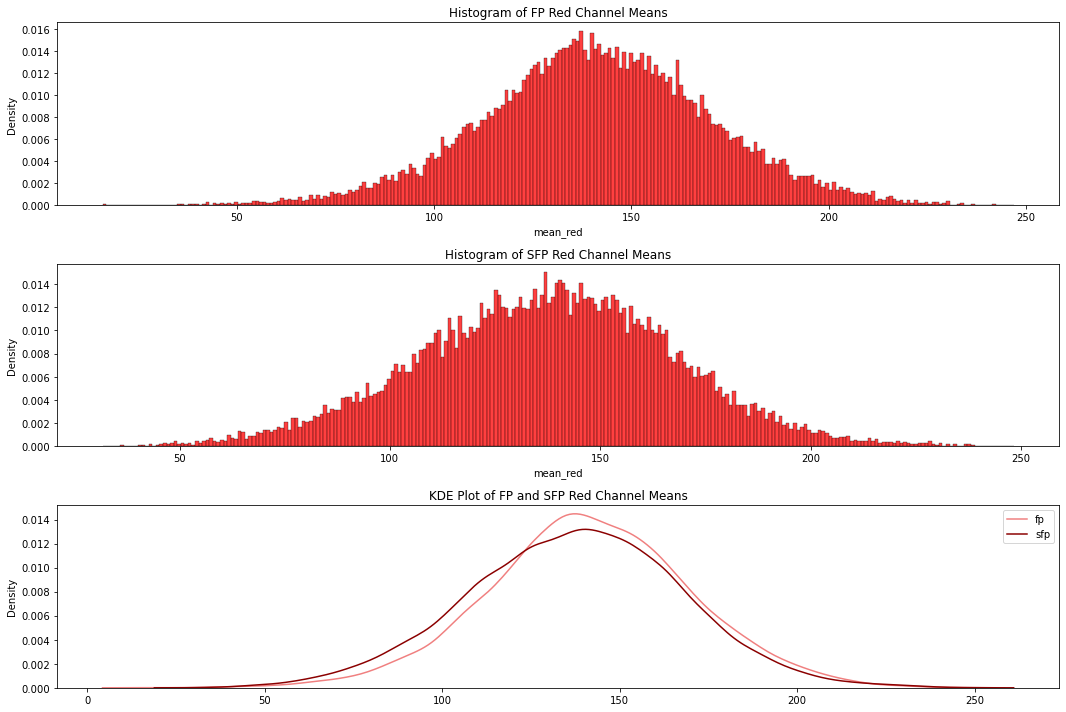

In [7]:
f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(311)
_ = sns.histplot(fp_image_df.mean_red, color='r', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of FP Red Channel Means')
ax2 = f.add_subplot(312)
_ = sns.histplot(sfp_image_df.mean_red, color='r', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of SFP Red Channel Means')
ax3 = f.add_subplot(313)
_ = sns.kdeplot(fp_image_df.mean_red, gridsize=256, color='lightcoral')
_ = sns.kdeplot(sfp_image_df.mean_red, gridsize=256, color='darkred')
_ = plt.title('KDE Plot of FP and SFP Red Channel Means')
_ = plt.legend(labels=['fp','sfp'],loc='upper right')
_ = plt.xlabel('')
plt.tight_layout()

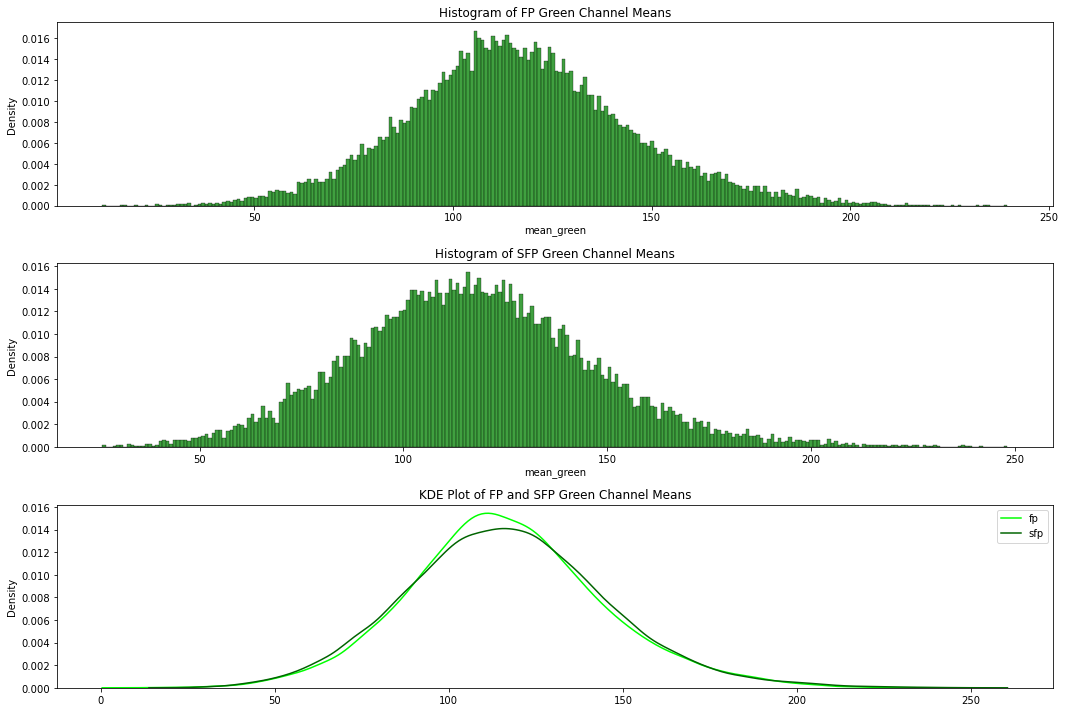

In [8]:
f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(311)
_ = sns.histplot(fp_image_df.mean_green, color='g', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of FP Green Channel Means')
ax2 = f.add_subplot(312)
_ = sns.histplot(sfp_image_df.mean_green, color='g', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of SFP Green Channel Means')
ax3 = f.add_subplot(313)
_ = sns.kdeplot(fp_image_df.mean_green, gridsize=256, color='lime')
_ = sns.kdeplot(sfp_image_df.mean_green, gridsize=256, color='darkgreen')
_ = plt.title('KDE Plot of FP and SFP Green Channel Means')
_ = plt.legend(labels=['fp','sfp'],loc='upper right')
_ = plt.xlabel('')
plt.tight_layout()

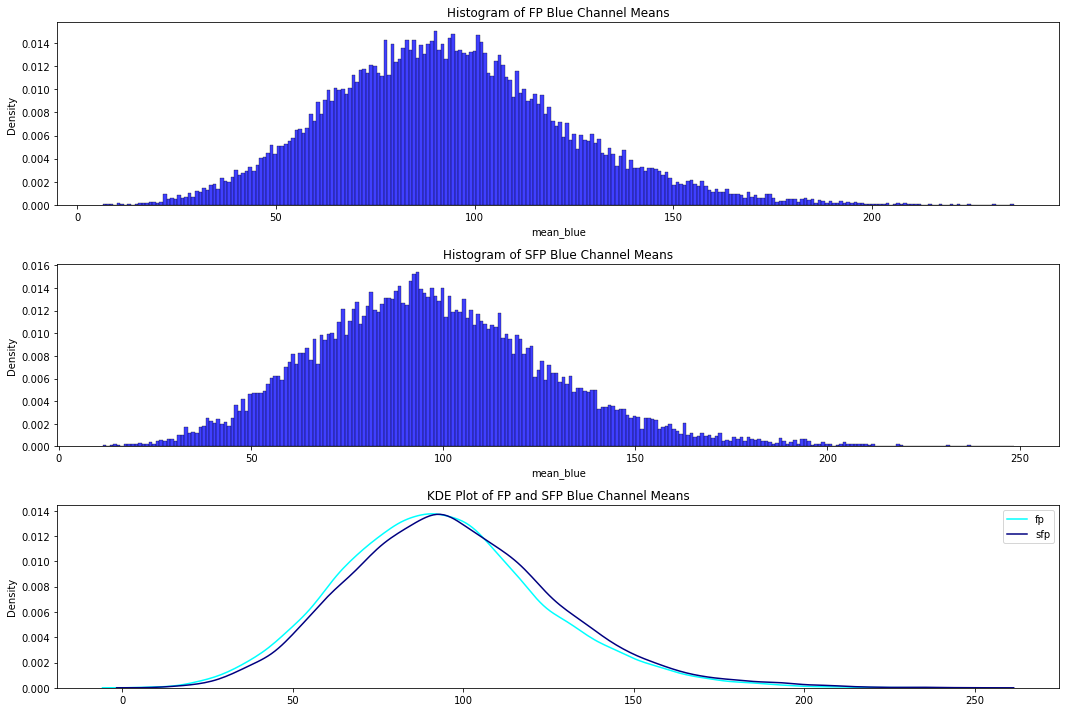

In [9]:
f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(311)
_ = sns.histplot(fp_image_df.mean_blue, color='b', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of FP Blue Channel Means')
ax2 = f.add_subplot(312)
_ = sns.histplot(sfp_image_df.mean_blue, color='b', bins=256, kde=False, stat='density')
_ = plt.title('Histogram of SFP Blue Channel Means')
ax3 = f.add_subplot(313)
_ = sns.kdeplot(fp_image_df.mean_blue, gridsize=256, color='aqua')
_ = sns.kdeplot(sfp_image_df.mean_blue, gridsize=256, color='navy')
_ = plt.title('KDE Plot of FP and SFP Blue Channel Means')
_ = plt.legend(labels=['fp','sfp'],loc='upper right')
_ = plt.xlabel('')
plt.tight_layout()

# Aspect Ratio Histograms

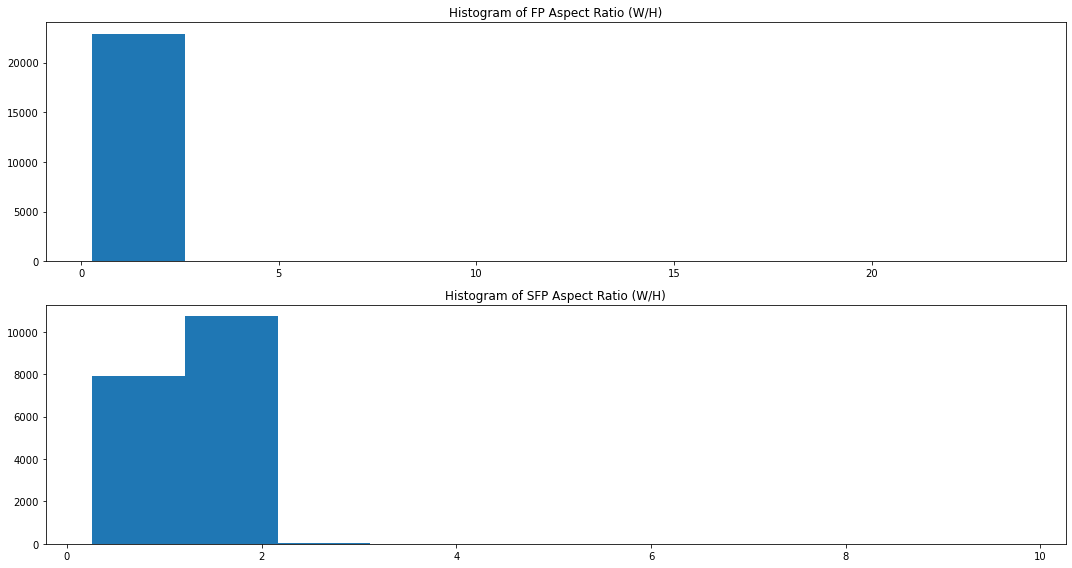

In [10]:
f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(211)
_ = plt.hist(fp_image_df['ratio_(w/h)'])
_ = plt.title('Histogram of FP Aspect Ratio (W/H)')
ax2 = f.add_subplot(212)
_ = plt.hist(sfp_image_df['ratio_(w/h)'])
_ = plt.title('Histogram of SFP Aspect Ratio (W/H)')

plt.tight_layout()

# Clustering

In [37]:
#224x224x3

In [19]:
def resize_and_flatted_image_df(image_path, new_path, size=(224,224)):
    
    #image_dict = { 'id':[], 'img_data':[]}
    
    img_to_convert = os.listdir(image_path)
    
    img_in_new = os.listdir(new_path)
    
    images = list(set(img_to_convert) - set(img_in_new))
    
    for image in tqdm(images):
        #try:
        img = io.imread(f'{image_path}/{image}')
        
        # resize and save new image
        img_resize = resize(img, (224,224))
        io.imsave(f'{new_path}/{image}', img_as_ubyte(img_resize))
        
            # append image data to image_dict
            #image_dict['id'].append(str.split(image, sep='.')[0])
            #image_dict['img_data'].append(img_resize.ravel())
        #except:
            
        #except Exception:
        #    pass
    #flattened_df = pd.DataFrame(data=image_dict)
    
    #return flattened_df

In [ ]:
current_path = 'Images/FP'
new_path = 'Images/FP_Resize'

resize_and_flatted_image_df(current_path, new_path)

  0%|          | 77/19794 [02:32<8:24:13,  1.53s/it] 

In [ ]:
#fp_resize_df.to_csv('Data/fp_resize.csv')

In [4]:
current_path = 'Images/SFP'
new_path = 'Images/SFP_Resize'

resize_and_flatted_image_df(current_path, new_path)

100%|██████████| 18682/18682 [41:43<00:00,  7.46it/s] 


In [ ]:
#sfp_resize_df.to_csv('Data/sfp_resize.csv')